In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("/home/kukanishka/Downloads/train.csv")   #reading of training data into dataframe
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['LoanAmount'][0:10]  

0    146.412162
1    128.000000
2     66.000000
3    120.000000
4    141.000000
5    267.000000
6     95.000000
7    158.000000
8    168.000000
9    349.000000
Name: LoanAmount, dtype: float64

In [7]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:
df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

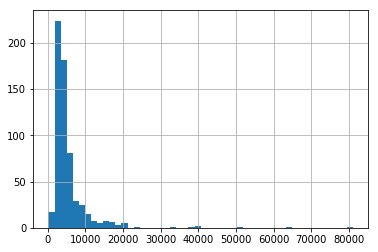

In [14]:
df['ApplicantIncome'].hist(bins=50)

In [20]:
new_data=df.dropna(axis=0)
new_data1=df.dropna(axis=0)
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [22]:
new_data.is_copy = False
var=['Education','Gender','Married','Dependents','Self_Employed','Property_Area','Loan_Status']
LE=LabelEncoder()
for i in var:
    new_data[i]=LE.fit_transform(new_data[i])
   
new_data[:10]

/home/kukanishka/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/kukanishka/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [8]:
predictors=['Credit_History','ApplicantIncome','Education','Married','Dependents','Self_Employed','Property_Area']
X=new_data[predictors]
y=new_data.Loan_Status
my_model=RandomForestClassifier(n_estimators=90)
train_X,val_X,train_Y,val_Y=train_test_split(X,y,random_state=0)
my_model.fit(train_X,train_Y)
prediction=my_model.predict(val_X)
accuracy=metrics.accuracy_score(prediction,val_Y)
print (accuracy)

0.7416666666666667
